In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import time

cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)
plotly.tools.set_credentials_file(username='axeloh', api_key='kLkm2t8VdedIzM8CdwZF')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

players = pd.read_csv('../datasets/fifa19_complete_player_dataset.csv')
players.head()
players.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [20]:
# Check what features correlates the most to Overall
correlations = players.corr().Overall
features = correlations.axes[0]
corrs = correlations.values

# Extracting every feature that correlates more than 50 %
interesting_features = []
for i in range(len(corrs)):
     if corrs[i] > 0.4:
            interesting_features.append(features[i])
print(interesting_features)

['Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Skill Moves', 'ShortPassing', 'Curve', 'LongPassing', 'BallControl', 'Reactions', 'ShotPower', 'LongShots', 'Vision', 'Composure']


In [21]:

# Only cares about those interesting features
X = players[interesting_features]

#print('Rows with one or more NaN-values: \n', players.isnull().sum())
print('Number of rows before dropping NaN-rows: \n', X.shape[0])
X = X.dropna()
print('Number of rows after dropping NaN-rows: \n', X.shape[0])
#print('Rows with one or more NaN-values: \n', players.isnull().sum())

y = X.Overall # Target
# Remove target from data
X = X.drop(columns=['Overall'])
X.head()

Number of rows before dropping NaN-rows: 
 18207
Number of rows after dropping NaN-rows: 
 18159


,Age,Potential,Special,International Reputation,Skill Moves,ShortPassing,Curve,LongPassing,BallControl,Reactions,ShotPower,LongShots,Vision,Composure
0,31,94,2202,5.0,4.0,90.0,93.0,87.0,96.0,95.0,85.0,94.0,94.0,96.0
1,33,94,2228,5.0,5.0,81.0,81.0,77.0,94.0,96.0,95.0,93.0,82.0,95.0
2,26,93,2143,5.0,5.0,84.0,88.0,78.0,95.0,94.0,80.0,82.0,87.0,94.0
3,27,93,1471,4.0,1.0,50.0,21.0,51.0,42.0,90.0,31.0,12.0,68.0,68.0
4,27,92,2281,4.0,4.0,92.0,85.0,91.0,91.0,91.0,91.0,91.0,94.0,88.0


In [22]:
train_X, test_X, train_y, test_y = train_test_split(X, y)

In [23]:
dt = DecisionTreeRegressor()
dt.fit(train_X, train_y)
preds = dt.predict(test_X)
print(preds[:10])
print(test_y[:10].values)
print(mean_absolute_error(test_y, preds))

[ 57.  59.  65.  61.  70.  71.  55.  57.  59.  51.]
[57 58 65 61 70 65 53 60 60 54]
1.24449339207


In [24]:
def get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes)
    model.fit(train_X, train_y)
    train_preds = model.predict(train_X)
    train_mae = mean_absolute_error(train_y, train_preds)
    test_preds = model.predict(test_X)
    test_mae = mean_absolute_error(test_y, test_preds)
    return train_mae, test_mae

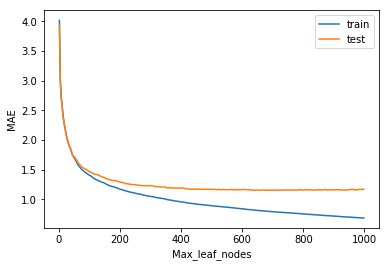

In [25]:
nodes = [i for i in range(2, 1000, 3)]
train_maes = []
test_maes = []
for max_leaf_nodes in range(2, 1000, 3):
    maes = get_mae(max_leaf_nodes, train_X, test_X, train_y, test_y)
    train_mae = maes[0]
    test_mae = maes[1]
    train_maes.append(train_mae)
    test_maes.append(test_mae)
    #print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, test_mae))
plt.plot(nodes, train_maes, label='train')
plt.plot(nodes, test_maes, label='test')
plt.xlabel('Max_leaf_nodes')
plt.ylabel('MAE')
plt.legend(loc='upper right')
plt.show()

In [26]:
final_model = DecisionTreeRegressor(max_leaf_nodes = 490)
final_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=490, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [27]:
preds = final_model.predict(test_X)
print(mean_absolute_error(preds, test_y))

#test_X['Prediction_Overall'] = final_model.predict(test_X)
# test_X['Actual_Overall'] = test_y.values

1.16877323612


In [28]:
preds[:5]

array([ 60.24390244,  58.66      ,  64.88461538,  61.66176471,  69.87068966])

In [29]:
test_y.head()

16420    57
16035    58
10552    65
14086    61
5357     70
Name: Overall, dtype: int64

In [35]:
import random

# Creating a Random Forest Tree (multiple Decision Trees)
class myRandomForestTree:
    
    def __init__(self, number_of_trees, max_leaf_nodes_trees):
        self.number_of_trees = number_of_trees
        self.max_leaf_nodes_trees = max_leaf_nodes_trees
        self.trees = []
        
    def create_trees(self, train_X, train_y, test_X):
        for i in range(self.number_of_trees):
            decision_tree = DecisionTreeRegressor(max_leaf_nodes=self.max_leaf_nodes_trees)
            decision_tree.fit(train_X, train_y)
            predictions = decision_tree.predict(test_X)
            self.trees.append(predictions)
        
    def getPredictions(self):
        predictions = []
        for i in range(len(self.trees[0])):
            sum = 0
            for t in self.trees:
                pred = t[i]
                sum += pred
            prediction = sum / len(self.trees) # mean
            predictions.append(prediction)
        return predictions
            

In [36]:
rft = myRandomForestTree(100, 490)
rft.create_trees(train_X, train_y, test_X)
print("MAE with my own Random Forest Tree: ", mean_absolute_error(rft_preds, test_y))

In [92]:
# Creating a RFT using sklearn
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)
rf_model_preds = rf_model.predict(test_X)
print("MAE with default sklearn Random Forest Tree: ", mean_absolute_error(rf_model_preds, test_y))

MAE with default sklearn Random Forest Tree:  0.918171806167


In [75]:
#Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 105, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [77]:
# Finds the optimal value for parameter max_depth and n_estimators
train_preds = []
test_preds = []

for i in range (10, 110, 5):
    rf_model = RandomForestRegressor(n_estimators = i)
    rf_model.fit(train_X, train_y)
    rf_model_preds1 = rf_model.predict(train_X)
    train_preds.append(mean_absolute_error(rf_model_preds1, train_y))
    rf_model_preds2 = rf_model.predict(test_X)
    test_preds.append(mean_absolute_error(rf_model_preds2, test_y))
    #print("MAE with {} nodes: {}".format(i, mean_absolute_error(rf_model_preds, test_y)))
    

In [78]:
preds = pd.DataFrame()
preds['train'] = train_preds
preds['test'] = test_preds
preds['Trees'] = [i for i in range(10, 110, 5)]
preds = preds.set_index(['Trees'])

preds.iplot(xTitle='Number of Trees', yTitle='MSE')

In [82]:
train_preds = []
test_preds = []

for i in range (2, 120, 5):
    rf_model = RandomForestRegressor(max_depth = i)
    rf_model.fit(train_X, train_y)
    rf_model_preds1 = rf_model.predict(train_X)
    train_preds.append(mean_absolute_error(rf_model_preds1, train_y))
    rf_model_preds2 = rf_model.predict(test_X)
    test_preds.append(mean_absolute_error(rf_model_preds2, test_y))
    #print("MAE with {} nodes: {}".format(i, mean_absolute_error(rf_model_preds, test_y)))
    

In [83]:
preds = pd.DataFrame()
preds['train'] = train_preds
preds['test'] = test_preds
preds['max_depth'] = [i for i in range(2, 120, 5)]
preds = preds.set_index(['max_depth'])

preds.iplot(xTitle='Max depth', yTitle='MSE')

In [87]:
# Creating the final RFT
from sklearn.ensemble import RandomForestRegressor
final_rf = RandomForestRegressor(max_depth=80, n_estimators=100)
final_rf.fit(train_X, train_y)
final_model_preds = final_rf.predict(test_X)
print("MAE with tweaked sklearn Random Forest Tree: ", mean_absolute_error(final_model_preds, test_y))

MAE with tweaked sklearn Random Forest Tree:  0.865165198238
